In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()

Saving student-mat-org.csv to student-mat-org.csv


In [ ]:
df = pd.read_csv(io.StringIO(data['student-mat-org.csv'].decode('utf-8')))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from scipy.stats import shapiro

#-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor

#-------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#------------------------------------- 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

In [ ]:
print("G3 range: Min={}, Max={}".format(df["G3"].min(), df["G3"].max()))
df.head(5)

G3 range: Min=0, Max=20


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
def create_g3_class(df):
    return ["Fail", "Medium", "Good"][0 if df["G3"] <= 5 else 1 if df["G3"] <= 15 else 2]

df["G3_class"] = df.apply(lambda row: create_g3_class(row), axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

from sklearn.model_selection import cross_val_score

In [ ]:
df.isnull().sum(axis=0).sort_values()

school        0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
paid          0
famsup        0
schoolsup     0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
G3            0
Fedu          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
Mjob          0
G3_class      0
dtype: int64

In [ ]:
df["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [ ]:
drop_features = ["school"]

data = df.drop(labels=drop_features, axis=1)

In [ ]:
def ordinal_encode(series, categories):
  encoder = OrdinalEncoder(categories=categories, dtype=np.int64)
  return encoder.fit_transform(series.values.reshape(-1, 1))

In [ ]:
categories_ordenc = {"sex": [["F", "M"]],
                     "address": [["R", "U"]],
                     "famsize": [["LE3", "GT3"]],
                     "Pstatus": [['A', 'T']],
                     "schoolsup": [["no", "yes"]],
                     "famsup": [["no", "yes"]],
                     "paid": [["no", "yes"]],
                     "activities": [["no", "yes"]],
                     "nursery": [["no", "yes"]],
                     "higher": [["no", "yes"]],
                     "internet": [["no", "yes"]],
                     "romantic": [["no", "yes"]],
                     }

for column, category in categories_ordenc.items():
   data[column] = ordinal_encode(data[column], category)

In [ ]:
def onehot_encode(data, column, categories):
  encoder = OneHotEncoder(categories=categories, drop="first", sparse=False, dtype=np.int64)
  encoded_features = encoder.fit_transform(data[column].values.reshape(-1, 1))
  encoder.transform(data[column].values.reshape(-1, 1))

  data = data.drop(labels=column, axis=1)

  for j, category in enumerate(categories[0][1:]):
    category_column_name = "{}_{}".format(column, category)
    data[category_column_name] = encoded_features[:, j]

  return data

In [ ]:
categories_hotenc = {"Fjob": [["other", "teacher", "health", "services", 'at_home']],
                     "Mjob": [["other", "teacher", "health", "services", 'at_home']],
                     "reason": [["other", "home", "reputation", "course"]],
                     "guardian": [["other", "mother", "father"]]}

for column, category in categories_hotenc.items():
  data = onehot_encode(data, column, category)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

In [ ]:
columns = data.columns
print("******************* Numeric field *******************\n")
for i in range(len(columns)):
    if data[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(data[columns[i]].unique())))
        
print("\n******************* Categorical field *******************\n")
for i in range(len(columns)):
    if data[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(data[columns[i]].unique())))

******************* Numeric field *******************

unique number of sex -> 2
unique number of age -> 8
unique number of address -> 2
unique number of famsize -> 2
unique number of Pstatus -> 2
unique number of Medu -> 5
unique number of Fedu -> 5
unique number of traveltime -> 4
unique number of studytime -> 4
unique number of failures -> 4
unique number of schoolsup -> 2
unique number of famsup -> 2
unique number of paid -> 2
unique number of activities -> 2
unique number of nursery -> 2
unique number of higher -> 2
unique number of internet -> 2
unique number of romantic -> 2
unique number of famrel -> 5
unique number of freetime -> 5
unique number of goout -> 5
unique number of Dalc -> 5
unique number of Walc -> 5
unique number of health -> 5
unique number of absences -> 34
unique number of G1 -> 17
unique number of G2 -> 17
unique number of G3 -> 18
unique number of Fjob_teacher -> 2
unique number of Fjob_health -> 2
unique number of Fjob_services -> 2
unique number of Fjob_at_

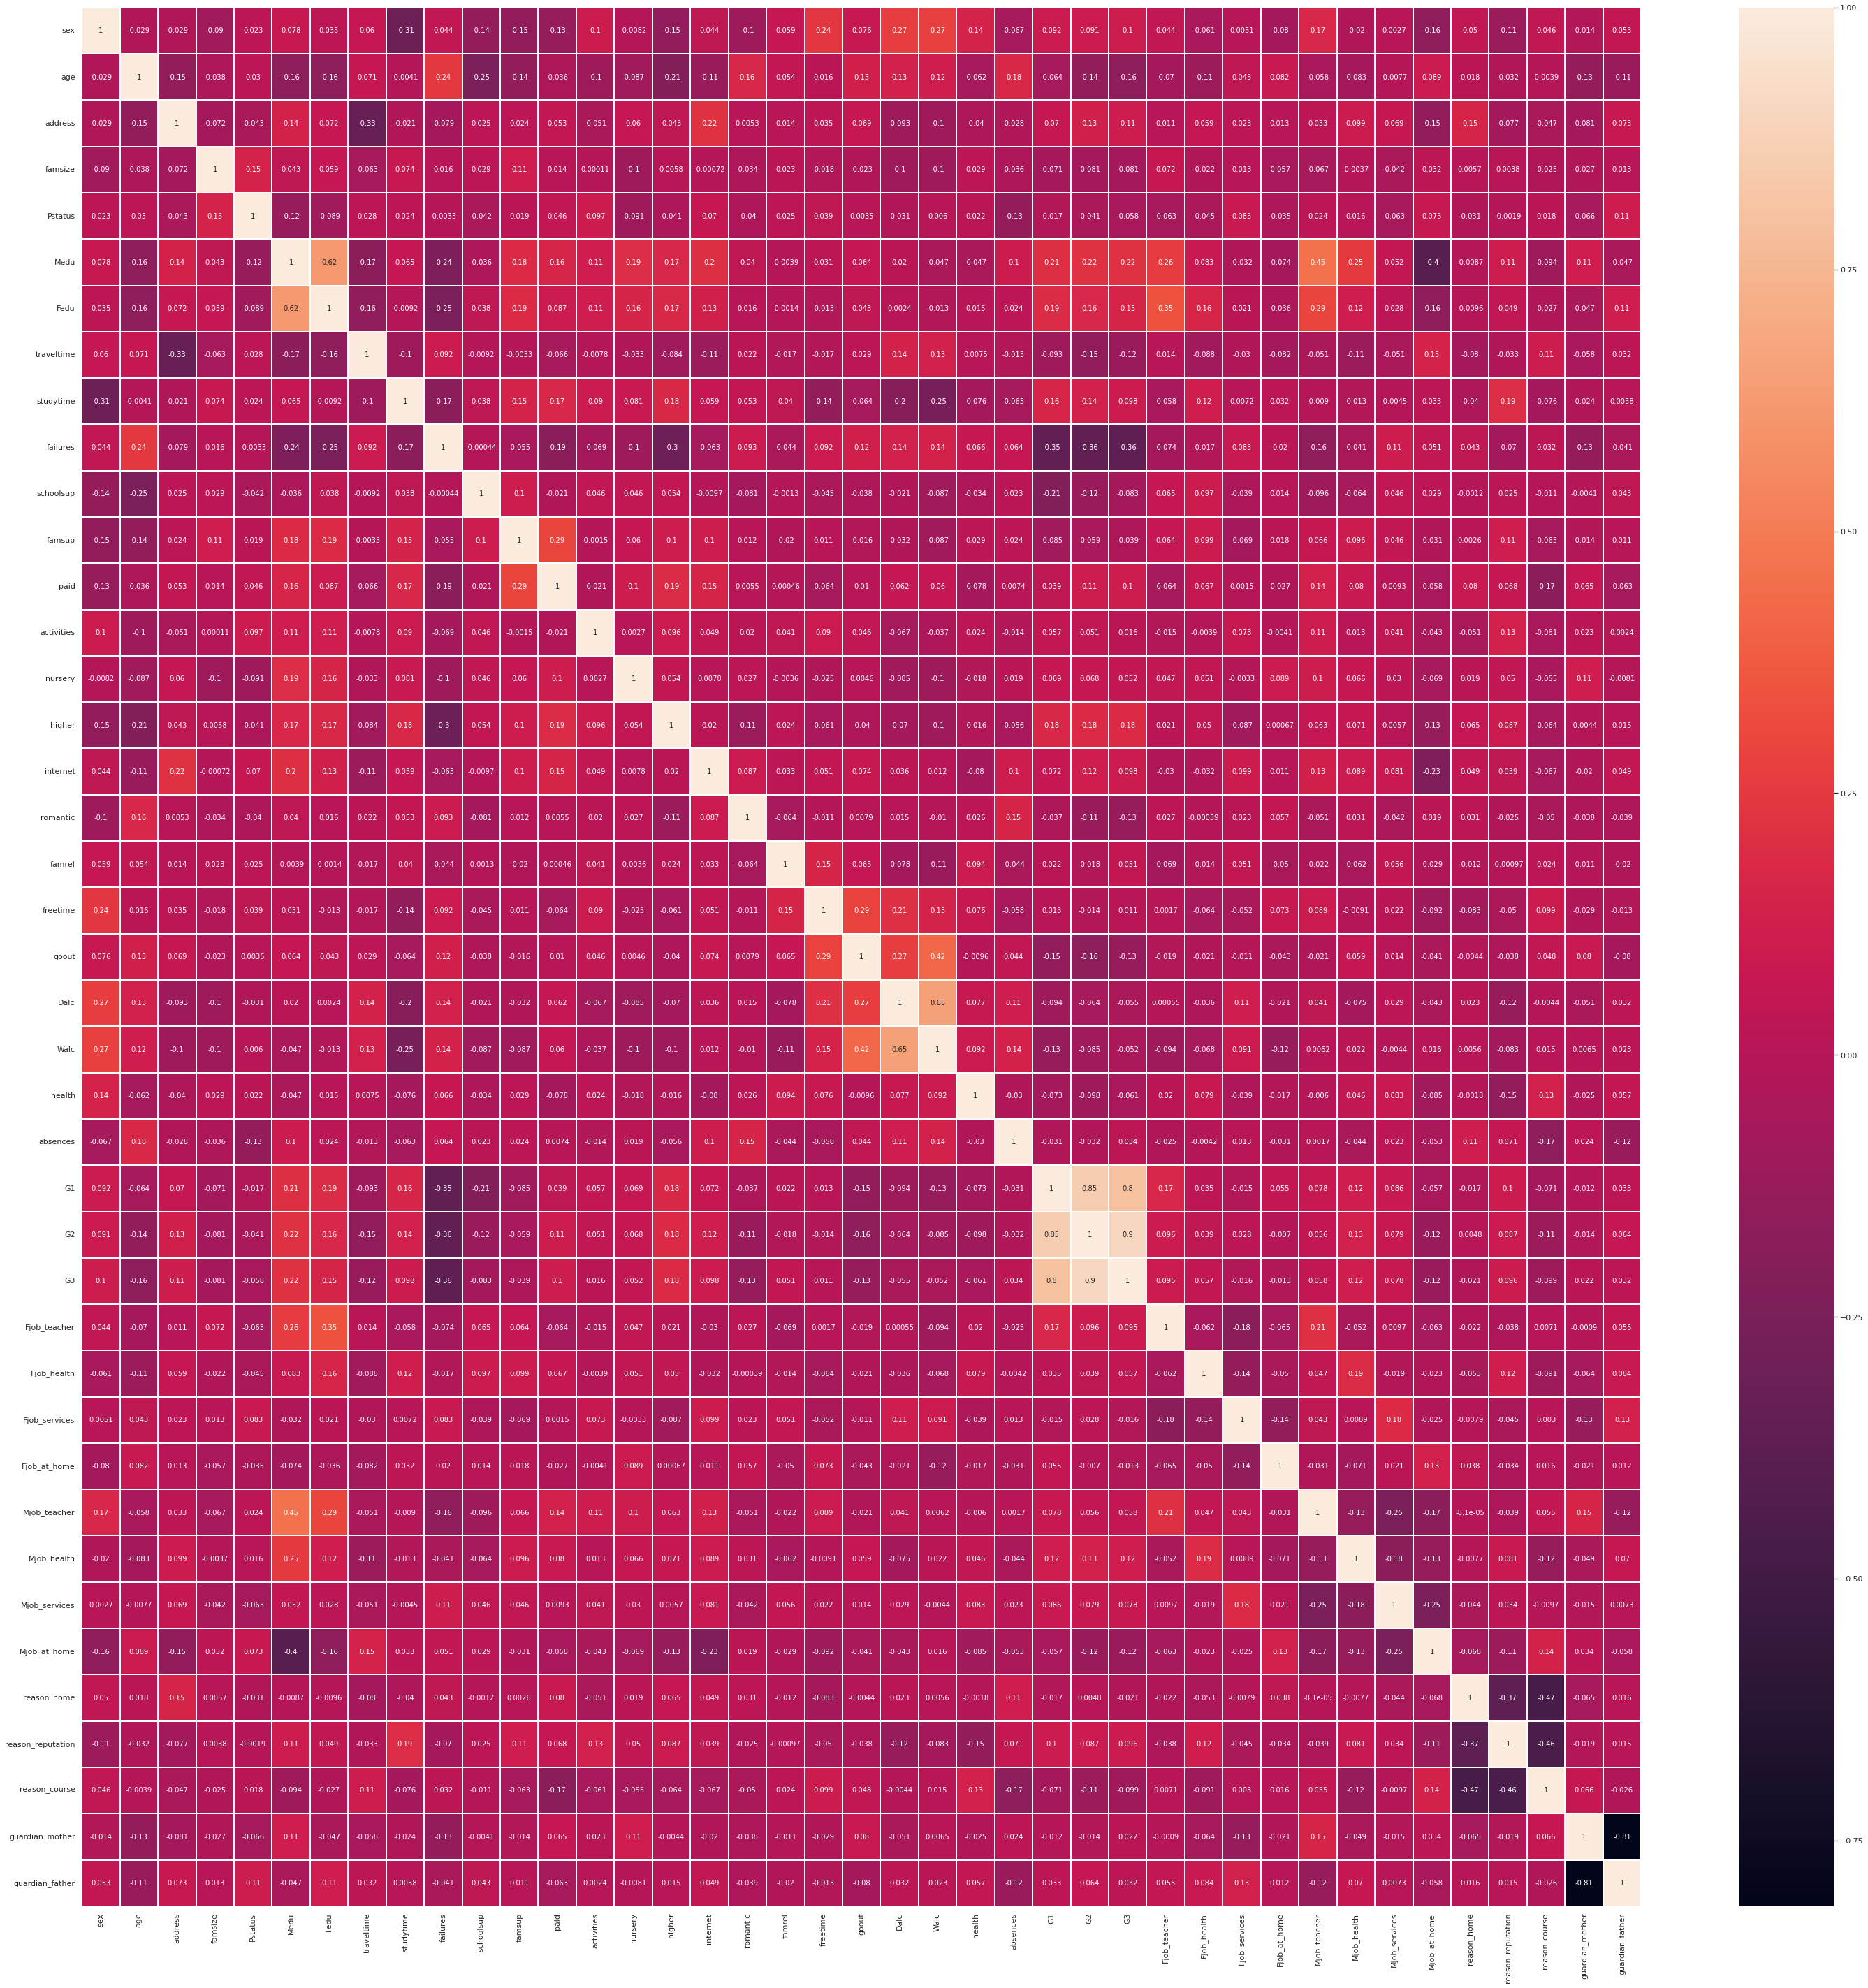

In [ ]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data.corr(),annot=True, linewidths=1)

In [ ]:
for c in data.columns:
    print(c,':',data[c].nunique())

sex : 2
age : 8
address : 2
famsize : 2
Pstatus : 2
Medu : 5
Fedu : 5
traveltime : 4
studytime : 4
failures : 4
schoolsup : 2
famsup : 2
paid : 2
activities : 2
nursery : 2
higher : 2
internet : 2
romantic : 2
famrel : 5
freetime : 5
goout : 5
Dalc : 5
Walc : 5
health : 5
absences : 34
G1 : 17
G2 : 17
G3 : 18
G3_class : 3
Fjob_teacher : 2
Fjob_health : 2
Fjob_services : 2
Fjob_at_home : 2
Mjob_teacher : 2
Mjob_health : 2
Mjob_services : 2
Mjob_at_home : 2
reason_home : 2
reason_reputation : 2
reason_course : 2
guardian_mother : 2
guardian_father : 2


In [ ]:
data.isnull().sum()

sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
G3_class             0
Fjob_teacher         0
Fjob_health          0
Fjob_services        0
Fjob_at_home         0
Mjob_teacher         0
Mjob_health          0
Mjob_services        0
Mjob_at_home         0
reason_home          0
reason_reputation    0
reason_course        0
guardian_mother      0
guardian_father      0
dtype: int64

In [ ]:
num_cols = list(data.select_dtypes(['int64','float64']))
num_cols

['sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'Fjob_teacher',
 'Fjob_health',
 'Fjob_services',
 'Fjob_at_home',
 'Mjob_teacher',
 'Mjob_health',
 'Mjob_services',
 'Mjob_at_home',
 'reason_home',
 'reason_reputation',
 'reason_course',
 'guardian_mother',
 'guardian_father']

In [ ]:
# define numerical predictors
num_pred = num_cols
num_pred

['sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'Fjob_teacher',
 'Fjob_health',
 'Fjob_services',
 'Fjob_at_home',
 'Mjob_teacher',
 'Mjob_health',
 'Mjob_services',
 'Mjob_at_home',
 'reason_home',
 'reason_reputation',
 'reason_course',
 'guardian_mother',
 'guardian_father']

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgbm
from lightgbm import *
pd.set_option("display.max_columns", None)

In [ ]:
data.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Fjob_teacher,Fjob_health,Fjob_services,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.500000,16.366667,0.800000,0.766667,0.800000,2.766667,2.633333,1.400000,2.133333,0.433333,0.100000,0.633333,0.300000,0.466667,0.866667,0.900000,0.833333,0.300000,3.500000,3.300000,2.633333,1.266667,1.766667,3.433333,0.0,11.866667,11.766667,9.733333,0.066667,0.066667,0.300000,0.100000,0.133333,0.133333,0.300000,0.133333,0.200000,0.266667,0.466667,0.466667,0.433333
std,0.508548,1.376736,0.406838,0.430183,0.406838,1.165106,1.098065,0.563242,1.008014,0.935261,0.305129,0.490133,0.466092,0.507416,0.345746,0.305129,0.379049,0.466092,0.937715,0.915386,1.129032,0.449776,1.072648,1.356551,0.0,4.368645,4.775536,7.678601,0.253708,0.253708,0.466092,0.305129,0.345746,0.345746,0.466092,0.345746,0.406838,0.449776,0.507416,0.507416,0.504007
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.250000,0.0,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,16.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.500000,0.0,11.000000,10.500000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,1.750000,2.000000,5.000000,0.0,16.000000,16.000000,16.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000
max,1.000000,20.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,0.0,19.000000,18.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
feature_cols = data.columns.unique()
#feature_cols = feature_cols.drop(["row_id", "time_id", "target"])
feature_cols

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Fjob_teacher', 'Fjob_health', 'Fjob_services', 'Fjob_at_home',
       'Mjob_teacher', 'Mjob_health', 'Mjob_services', 'Mjob_at_home',
       'reason_home', 'reason_reputation', 'reason_course', 'guardian_mother',
       'guardian_father'],
      dtype='object')

In [ ]:
drop_features = ["G3_class"]

data = data.drop(labels=drop_features, axis=1)




In [ ]:
outlier_list = []

for col in feature_cols :
    
    temp_df = data[(data[col] > data[col].mean() + data[col].std() * 70) |
                       (data[col] < data[col].mean() - data[col].std() * 70) ]
    if len(temp_df) >0 :
        outliers = temp_df.index.to_list()
        outlier_list.extend(outliers)
        print(col, len(temp_df))

outlier_list = list(set(outlier_list))
print(len(outlier_list))

0


In [ ]:
outlier_list = []
outlier_col = []

for col in feature_cols :
    
    temp_df = data[(data[col] > data[col].mean() + data[col].std() * 70) |
                       (data[col] < data[col].mean() - data[col].std() * 70) ]
    temp2_df = data[(data[col] > data[col].mean() + data[col].std() * 35) |
                        (data[col] < data[col].mean() - data[col].std() * 35) ]
    if len(temp_df) >0 : 
        outliers = temp_df.index.to_list()
        outlier_list.extend(outliers)
        outlier_col.append(col)
        print(col, len(temp_df))
    elif len(temp2_df)>0 and len(temp2_df) <6 :
        outliers = temp2_df.index.to_list()
        outlier_list.extend(outliers)
        outlier_col.append(col)
        print(col, len(temp2_df))

outlier_list = list(set(outlier_list))
print(len(outlier_col), len(outlier_list))

0 0


In [ ]:
data['G3_class'].value_counts()

Medium    309
Fail       46
Good       40
Name: G3_class, dtype: int64

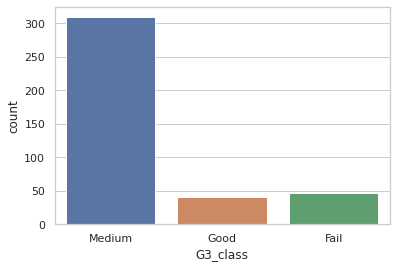

In [ ]:
sns.countplot(x=data['G3_class'])

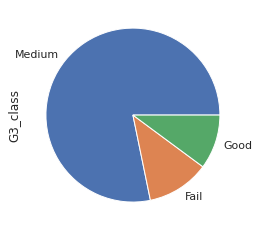

In [ ]:
data['G3_class'].value_counts().plot.pie(y='G3_class')

In [ ]:
def outlier_detect(data, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return data[((data[col] < (q1_col - 1.5 * iqr_col)) |(data[col] > (q3_col + 1.5 * iqr_col)))]

# ----------------------------------------------
def outlier_detect_normal(data, col):
    m = data[col].mean()
    s = data[col].std()
    return data[((data[col]-m)/s).abs()>3]

# ----------------------------------------------
def lower_outlier(data, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = data[(data[col] < (q1_col - 1.5 * iqr_col))]
    return lower
def upper_outlier(data, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = data[(data[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# ----------------------------------------------
def preprocess(data, col):
    print("************************* {} *************************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(data,col).shape[0], upper_outlier(data,col).shape[0]))
    plt.figure(figsize=(8,5))
    data[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.show()
     

In [ ]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()

#------------------------------------------------------
numeric_feature = df.dtypes!=object
final_numeric_feature = df.columns[numeric_feature].tolist()

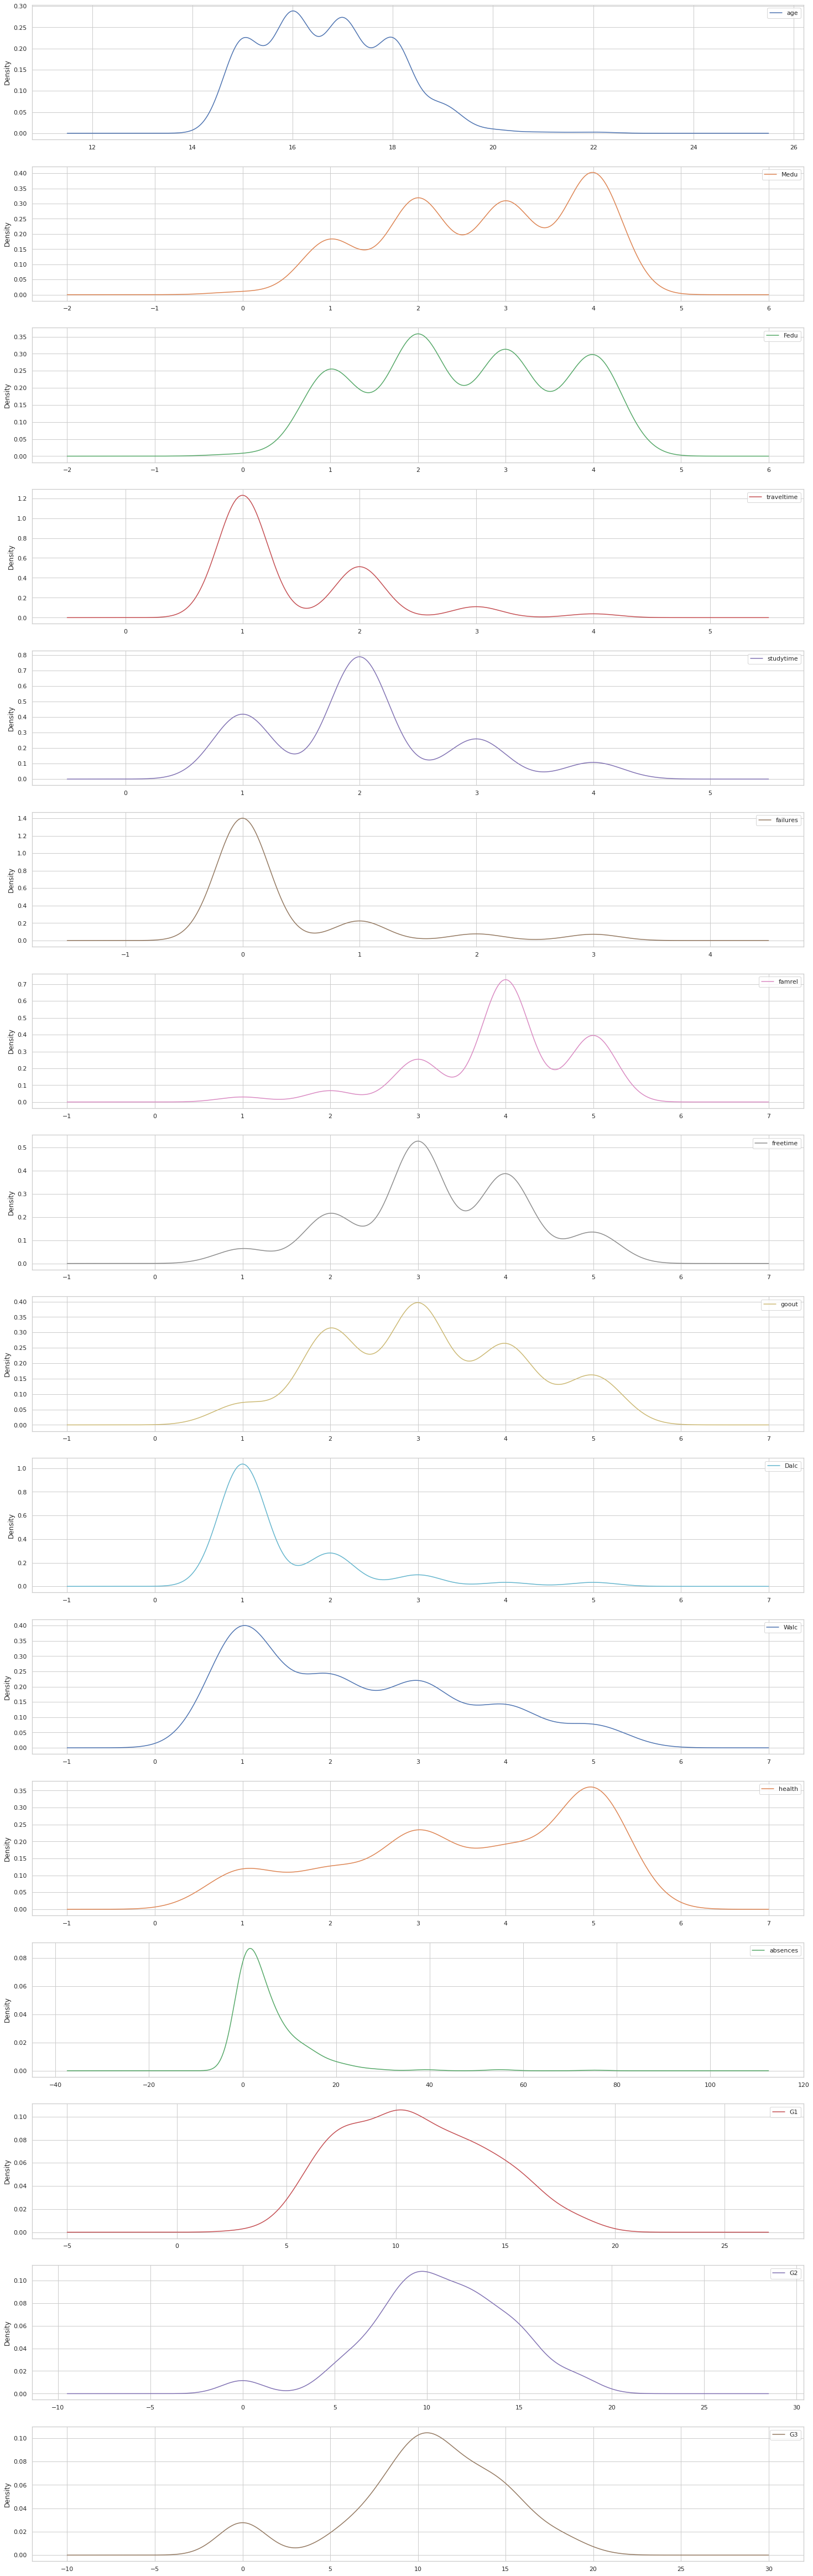

In [ ]:
df[final_numeric_feature].plot(kind='density', subplots=True, sharex=False, figsize= (25,85))
plt.show()

In [ ]:
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=df,
                      x='G3_class', hue=column, ax=ax[0])

        sns.countplot(data=df, x=column, ax=ax[1])

        sns.boxplot(data=df, x=column,
                    y='G3', ax=ax[2])

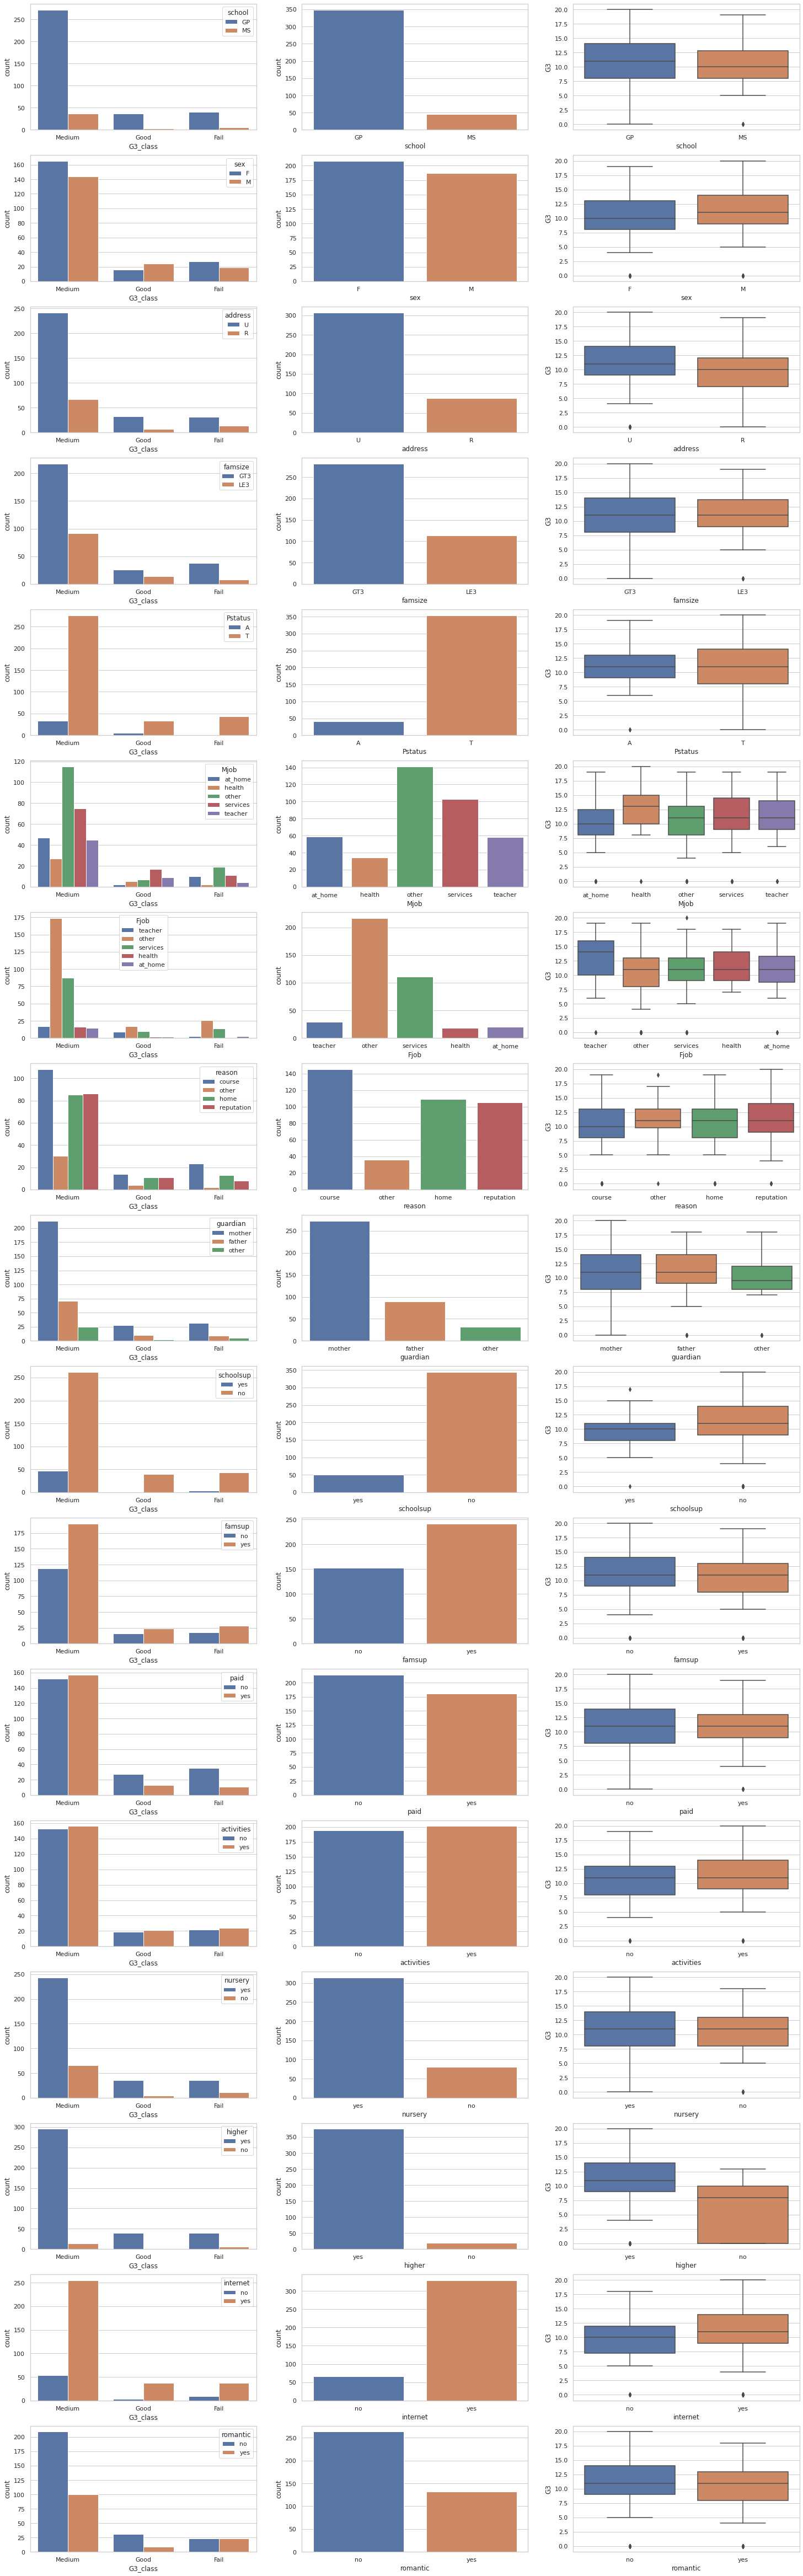

In [ ]:
columns = df.select_dtypes(include='object')
columns = columns.drop('G3_class', axis=1)
plot_categorical_insight(columns)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
for i in range(len(final_numeric_feature)):
    stat,p = shapiro(df[final_numeric_feature[i]])
    print(final_numeric_feature[i])
    print('P_value=%.3f' % (p))
    print("*******************************")

age
P_value=0.000
*******************************
Medu
P_value=0.000
*******************************
Fedu
P_value=0.000
*******************************
traveltime
P_value=0.000
*******************************
studytime
P_value=0.000
*******************************
failures
P_value=0.000
*******************************
famrel
P_value=0.000
*******************************
freetime
P_value=0.000
*******************************
goout
P_value=0.000
*******************************
Dalc
P_value=0.000
*******************************
Walc
P_value=0.000
*******************************
health
P_value=0.000
*******************************
absences
P_value=0.000
*******************************
G1
P_value=0.000
*******************************
G2
P_value=0.000
*******************************
G3
P_value=0.000
*******************************


In [ ]:
def preprocess(df, col):
    print("************************* {} *************************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(8,5))
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.show()
    

************************* age *************************

lower outlier: 0 ****** upper outlier: 1



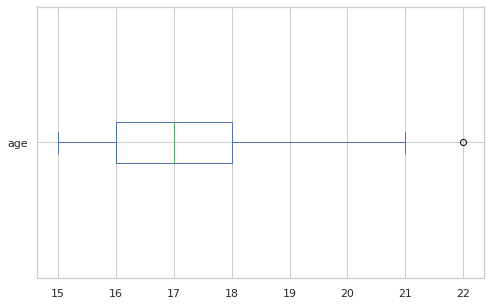

************************* Medu *************************

lower outlier: 0 ****** upper outlier: 0



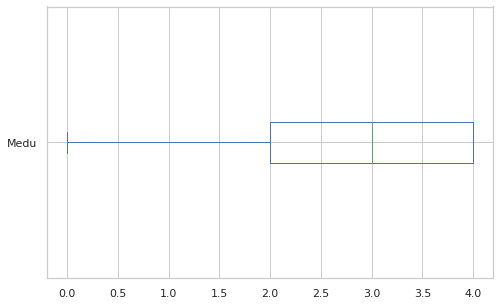

************************* Fedu *************************

lower outlier: 2 ****** upper outlier: 0



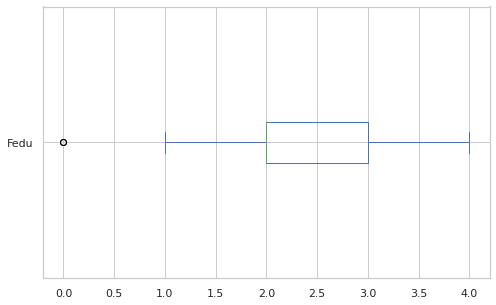

************************* traveltime *************************

lower outlier: 0 ****** upper outlier: 8



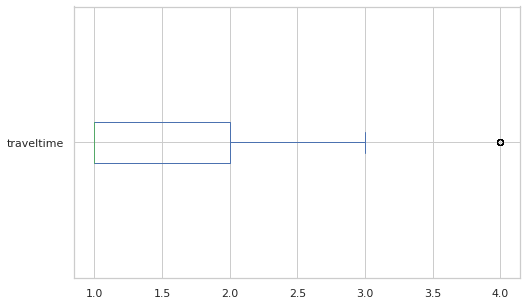

************************* studytime *************************

lower outlier: 0 ****** upper outlier: 27



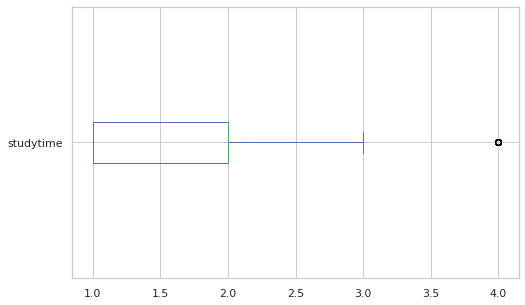

************************* failures *************************

lower outlier: 0 ****** upper outlier: 83



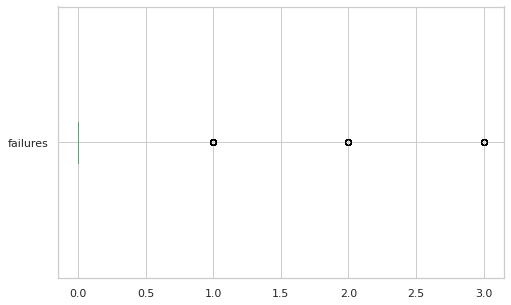

************************* famrel *************************

lower outlier: 26 ****** upper outlier: 0



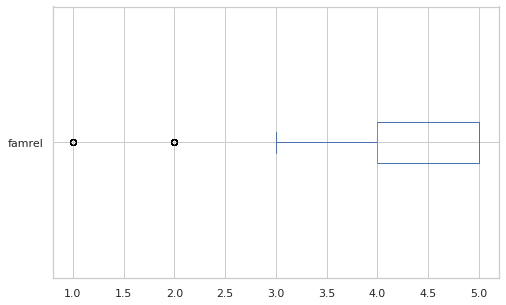

************************* freetime *************************

lower outlier: 19 ****** upper outlier: 0



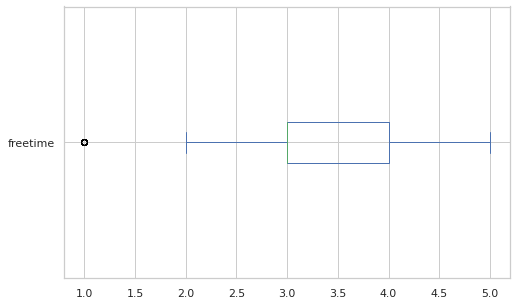

************************* goout *************************

lower outlier: 0 ****** upper outlier: 0



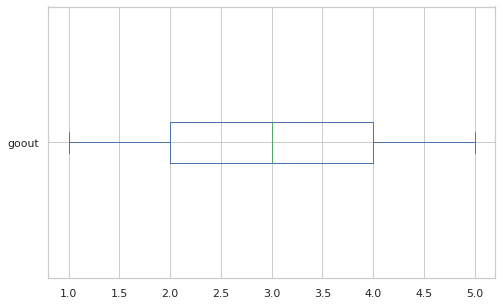

************************* Dalc *************************

lower outlier: 0 ****** upper outlier: 18



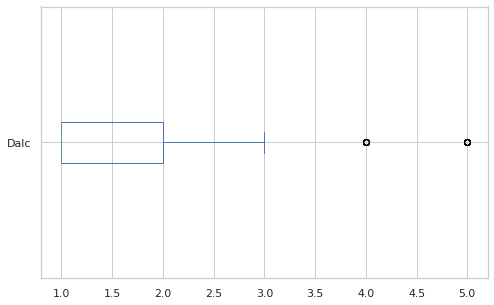

************************* Walc *************************

lower outlier: 0 ****** upper outlier: 0



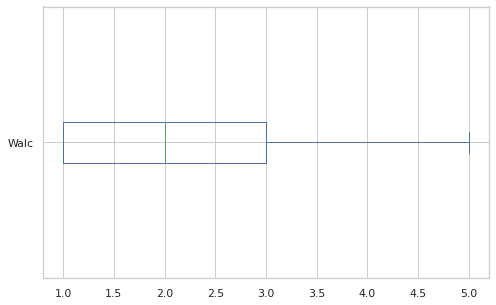

************************* health *************************

lower outlier: 0 ****** upper outlier: 0



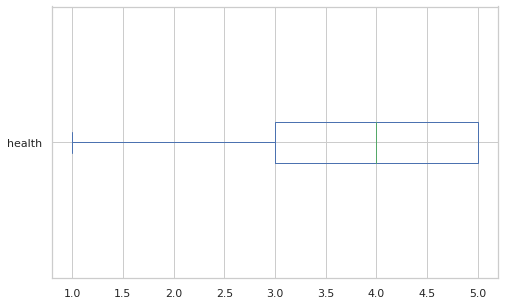

************************* absences *************************

lower outlier: 0 ****** upper outlier: 15



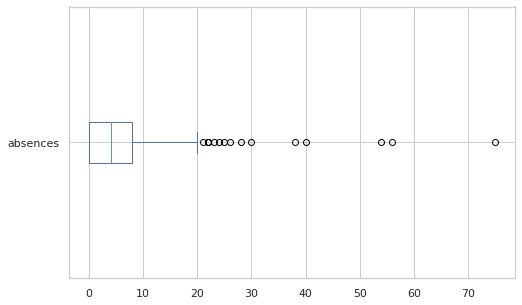

************************* G1 *************************

lower outlier: 0 ****** upper outlier: 0



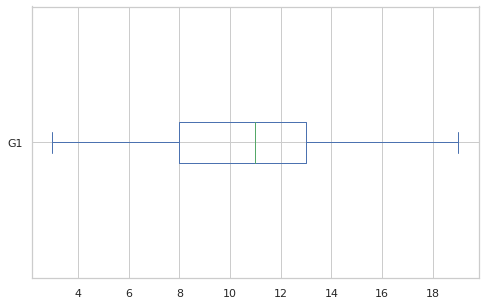

************************* G2 *************************

lower outlier: 13 ****** upper outlier: 0



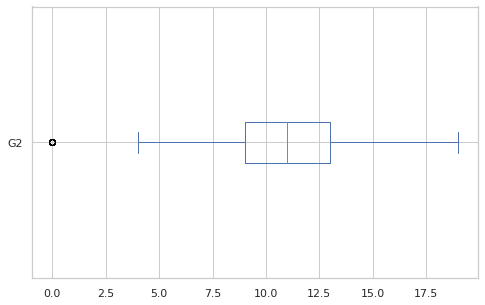

************************* G3 *************************

lower outlier: 0 ****** upper outlier: 0



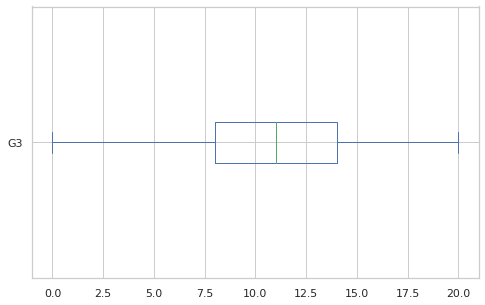

In [ ]:
for i in range(len(final_numeric_feature)):
    preprocess(df[final_numeric_feature], final_numeric_feature[i])

In [ ]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],(outlier_detect(df[final_numeric_feature],final_numeric_feature[i]).shape[0])))

IQR => age: 1
IQR => Medu: 0
IQR => Fedu: 2
IQR => traveltime: 8
IQR => studytime: 27
IQR => failures: 83
IQR => famrel: 26
IQR => freetime: 19
IQR => goout: 0
IQR => Dalc: 18
IQR => Walc: 0
IQR => health: 0
IQR => absences: 15
IQR => G1: 0
IQR => G2: 13
IQR => G3: 0


In [ ]:
for i in range(len(final_categorical_feature)):
    print("\n************ {} ************".format(final_categorical_feature[i]))
    print(df[final_categorical_feature[i]].unique())


************ school ************
['GP' 'MS']

************ sex ************
['F' 'M']

************ address ************
['U' 'R']

************ famsize ************
['GT3' 'LE3']

************ Pstatus ************
['A' 'T']

************ Mjob ************
['at_home' 'health' 'other' 'services' 'teacher']

************ Fjob ************
['teacher' 'other' 'services' 'health' 'at_home']

************ reason ************
['course' 'other' 'home' 'reputation']

************ guardian ************
['mother' 'father' 'other']

************ schoolsup ************
['yes' 'no']

************ famsup ************
['no' 'yes']

************ paid ************
['no' 'yes']

************ activities ************
['no' 'yes']

************ nursery ************
['yes' 'no']

************ higher ************
['yes' 'no']

************ internet ************
['no' 'yes']

************ romantic ************
['no' 'yes']

************ G3_class ************
['Medium' 'Good' 'Fail']


In [ ]:
df['G3_class'].value_counts()

Medium    309
Fail       46
Good       40
Name: G3_class, dtype: int64

Text(0.5, 1.0, 'G2')

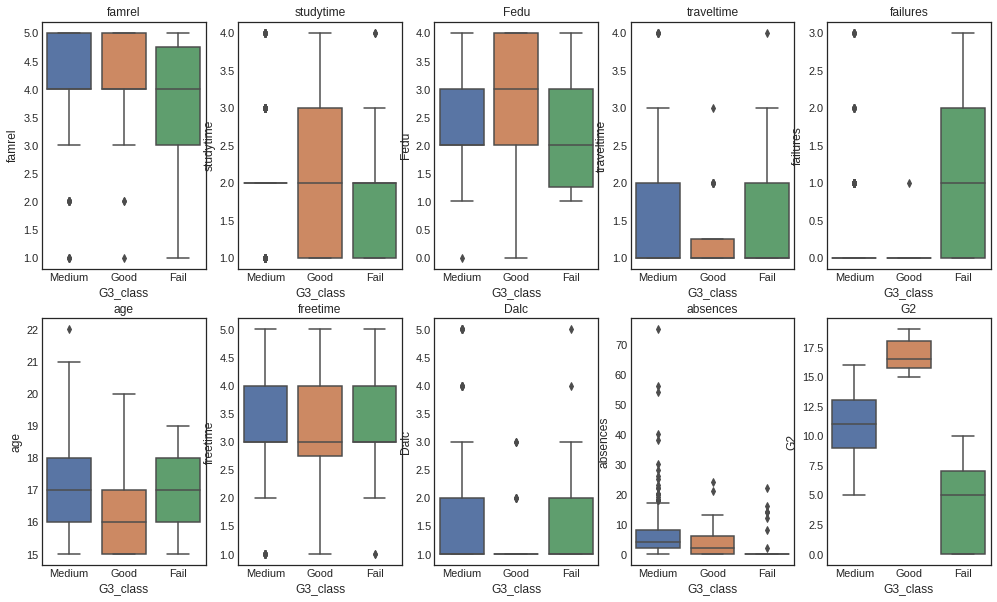

In [ ]:
plt.figure(figsize = (17, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(2,5,1)
sns.boxplot(x='G3_class',y='famrel',data=df)
ax.set_title('famrel')
ax=plt.subplot(2,5,2)
sns.boxplot(x='G3_class',y='studytime',data=df)
ax.set_title('studytime')
ax=plt.subplot(2,5,3)
sns.boxplot(x='G3_class',y='Fedu',data=df)
ax.set_title('Fedu')
ax=plt.subplot(2,5,4)
sns.boxplot(x='G3_class',y='traveltime',data=df)
ax.set_title('traveltime')
ax=plt.subplot(2,5,5)
sns.boxplot(x='G3_class',y='failures',data=df)
ax.set_title('failures')
ax=plt.subplot(2,5,6)
sns.boxplot(x='G3_class',y='age',data=df)
ax.set_title('age')
ax=plt.subplot(2,5,7)
sns.boxplot(x='G3_class',y='freetime',data=df)
ax.set_title('freetime')
ax=plt.subplot(2,5,8)
sns.boxplot(x='G3_class',y='Dalc',data=df)
ax.set_title('Dalc')
ax=plt.subplot(2,5,9)
sns.boxplot(x='G3_class',y='absences',data=df)
ax.set_title('absences')
ax=plt.subplot(2,5,10)
sns.boxplot(x='G3_class',y='G2',data=df)
ax.set_title('G2')

In [ ]:
def outlierdetection(df):
    sorted(df)
    
    Q1,Q3=np.percentile(df,[25,75])
    
    IQR=Q3-Q1
    
    lower_range=Q1-(1.5*IQR)
    
    Upper_range=Q3+(1.5*IQR)
    
    return lower_range,Upper_range

In [ ]:
d1=df[df['G3_class'] == 'Medium'].famrel
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Good'].famrel
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)

2.5 6.5
2.5 6.5


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.famrel < Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.famrel> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.famrel< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.famrel> Ur)],inplace=True)

In [ ]:
d1=df[df['G3_class'] == 'Medium'].Fedu
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)


0.5 4.5


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.Fedu < Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.Fedu> Ur)],inplace=True)


In [ ]:
d1=df[df['G3_class'] == 'Medium'].studytime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Fail'].studytime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)


2.0 2.0
-0.5 3.5


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.studytime < Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.studytime> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.studytime< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.studytime> Ur)],inplace=True)

In [ ]:
d1=df[df['G3_class'] == 'Medium'].traveltime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Good'].traveltime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Fail'].traveltime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)

-0.5 3.5
0.625 1.625
-0.5 3.5


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.traveltime< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.traveltime> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.traveltime< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.traveltime> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.traveltime < Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.traveltime> Ur)],inplace=True)


In [ ]:
d1=df[df['G3_class'] == 'Medium'].failures
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Good'].failures
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)

0.0 0.0
0.0 0.0


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.failures< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.failures> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.failures< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.failures> Ur)],inplace=True)

In [ ]:
d1=df[df['G3_class'] == 'Medium'].age
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)


13.0 21.0


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.age< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.age> Ur)],inplace=True)

In [ ]:
d1=df[df['G3_class'] == 'Medium'].freetime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Fail'].freetime
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)


1.5 5.5
1.5 5.5


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.freetime < Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.freetime> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.freetime< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.freetime> Ur)],inplace=True)

In [ ]:
d1=df[df['G3_class'] == 'Medium'].Dalc
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Good'].Dalc
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Fail'].Dalc
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)

-0.5 3.5
1.0 1.0
-0.5 3.5


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.Dalc< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.Dalc> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.Dalc< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.Dalc> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.Dalc < Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.Dalc> Ur)],inplace=True)

In [ ]:
d1=df[df['G3_class'] == 'Medium'].absences
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Good'].absences
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)
d1=df[df['G3_class'] == 'Fail'].absences
Lr,Ur=outlierdetection(d1)
print(Lr,Ur)

-7.0 17.0
-9.0 15.0
0.0 0.0


In [ ]:
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.absences< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Medium') & (data.absences> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.absences< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Good') & (data.absences> Ur)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.absences< Lr)],inplace=True)
data.drop(data.index[(data['G3_class'] == 'Fail') & (data.absences> Ur)],inplace=True)

In [ ]:
data['G3_class'].value_counts()

Good      12
Fail      10
Medium     8
Name: G3_class, dtype: int64

In [ ]:
y = df['G3_class']
X = df.drop(['G3', 'G3_class'], axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
names = ['RandomForestClassifier', 'NaiveBayes' , 'DecisionTreeClassifier', 'XGBClassifier']

clf_list = [RandomForestClassifier(),
            MultinomialNB(),
            DecisionTreeClassifier(),
           xgb.XGBClassifier()]

In [ ]:
clf_scores = {}
for name, clf in zip(names, clf_list):
    clf_scores[name]= cross_val_score(clf, X, y, cv=5).mean()
    print(name, end=': ')
    print(clf_scores[name])

RandomForestClassifier: 0.8759493670886076
NaiveBayes: 0.7594936708860759
DecisionTreeClassifier: 0.8607594936708862
XGBClassifier: 0.8632911392405063


In [ ]:
best_classifier = sorted(clf_scores, key=clf_scores.get, reverse=True)[0]
best_classifier

'RandomForestClassifier'

In [ ]:
clf = clf_list[names.index(best_classifier)]
clf.fit(X, y)

RandomForestClassifier()

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    if(importances[indices[f]] >= 0.01):
        print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.249243)
2. Feature G1 (0.154158)
3. Feature absences (0.071470)
4. Feature age (0.028204)
5. Feature failures (0.026172)
6. Feature health (0.023167)
7. Feature Walc (0.023013)
8. Feature goout (0.022933)
9. Feature Medu (0.021702)
10. Feature studytime (0.019940)
11. Feature famrel (0.019700)
12. Feature Fedu (0.019430)
13. Feature freetime (0.018132)
14. Feature paid_no (0.011709)
15. Feature Dalc (0.011590)
16. Feature traveltime (0.011321)
17. Feature Mjob_other (0.010145)


In [ ]:
X = df.drop(['G3', 'G2', 'G1', 'G3_class'], axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
clf_scores = {}
for name, clf in zip(names, clf_list):
    clf_scores[name]= cross_val_score(clf, X, y, cv=5).mean()
    print(name, end=': ')
    print(clf_scores[name])

RandomForestClassifier: 0.7873417721518987
NaiveBayes: 0.6354430379746836
DecisionTreeClassifier: 0.6835443037974684
XGBClassifier: 0.7670886075949367


In [ ]:
best_classifier = sorted(clf_scores, key=clf_scores.get, reverse=True)[0]
best_classifier

'RandomForestClassifier'

In [ ]:
clf = clf_list[names.index(best_classifier)]
clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    if(importances[indices[f]] >= 0.01):
        print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature absences (0.110201)
2. Feature goout (0.044653)
3. Feature freetime (0.041255)
4. Feature age (0.040127)
5. Feature health (0.039275)
6. Feature failures (0.039256)
7. Feature studytime (0.038769)
8. Feature Fedu (0.034350)
9. Feature Walc (0.032975)
10. Feature famrel (0.031877)
11. Feature Medu (0.031175)
12. Feature traveltime (0.025228)
13. Feature Mjob_services (0.019069)
14. Feature paid_no (0.017356)
15. Feature paid_yes (0.017017)
16. Feature Fjob_teacher (0.016868)
17. Feature Mjob_other (0.016071)
18. Feature activities_yes (0.016017)
19. Feature reason_course (0.014779)
20. Feature romantic_no (0.014583)
21. Feature reason_reputation (0.014345)
22. Feature Dalc (0.014287)
23. Feature romantic_yes (0.014240)
24. Feature guardian_mother (0.014087)
25. Feature famsup_no (0.013997)
26. Feature famsup_yes (0.013568)
27. Feature famsize_GT3 (0.013445)
28. Feature activities_no (0.012934)
29. Feature Fjob_other (0.012905)
30. Feature reason_home (0.012352)
31. Feature Fj

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['G3_class'], axis=1)
X = pd.get_dummies(X)     #Convert to categorical
y = df['G3_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, stratify=y)
X_train= X_train.drop(['G3'], axis=1)
import copy
X_test_withG3 = copy.deepcopy(X_test)    #will be used in end to display actual G3 score
X_test= X_test.drop(['G3'], axis=1)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

using classifer: RandomForestClassifier
Confusion matrix, without normalization
Normalized confusion matrix


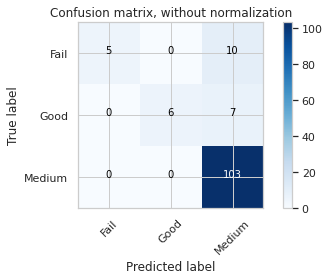

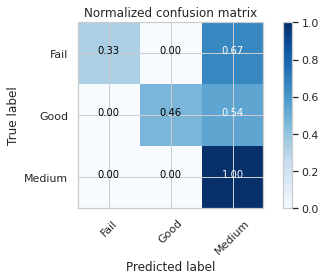

In [ ]:
clf = clf_list[names.index(best_classifier)]
print("using classifer: %s"%best_classifier)
# clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# print(clf.classes_)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, normalize=True, title='Normalized confusion matrix')

plt.show()

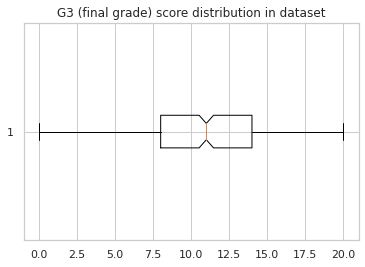

In [ ]:
plt.figure()
plt.boxplot(df['G3'], notch=True, sym='gD', vert=False)
plt.title('G3 (final grade) score distribution in dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


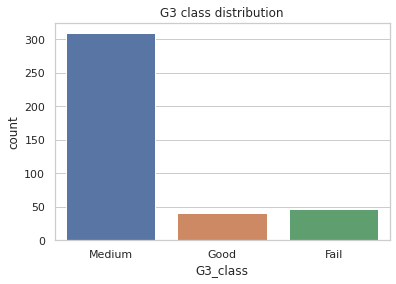

In [ ]:
p = sns.countplot(df['G3_class']).set_title('G3 class distribution')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.ensemble import BalanceCascade
import tensorflow
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import CondensedNearestNeighbour, AllKNN, OneSidedSelection, RandomUnderSampler
#from imblearn.ensemble import BalanceCascade, EasyEnsemble

from collections import Counter
# X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
X_resampled, y_resampled = AllKNN(sampling_strategy=['Medium']).fit_resample(X_train, y_train)
# X_resampled, y_resampled = SMOTETomek().fit_resample(X_train, y_train)  #sampling_strategy='minority'
# X_resampled, y_resampled = EasyEnsemble().fit_resample(X_train, y_train)
# X_resampled = X_resampled[0] ; y_resampled = y_resampled[0]
print(sorted(Counter(y_resampled).items()))

ImportError: ignored

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_resampled) #pd.get_dummies(data)
principalDf_train = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalComponentstest = pca.fit_transform(X_test) #pd.get_dummies(data)
principalDf_test = pd.DataFrame(data = principalComponentstest
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

Using classifier: RandomForestClassifier
Confusion matrix, without normalization
Normalized confusion matrix


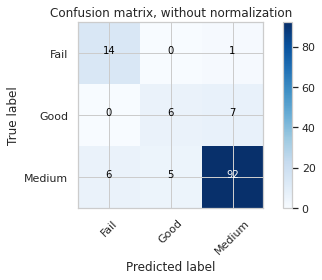

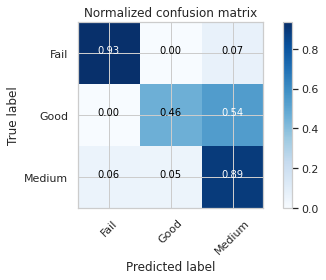

In [ ]:
clf = clf_list[names.index(best_classifier)]
print("Using classifier: %s"%best_classifier)
# clf = xgb.XGBClassifier()
# clf = DecisionTreeClassifier()  #Using for demo and consistency
clf.fit(principalDf_train, y_resampled)

y_pred = clf.predict(principalDf_test)
y_pred_prob = clf.predict_proba(principalDf_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# print(clf.classes_)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
y_test_list = list(y_test)
X_test_withG3_list = list(X_test_withG3['G3'])
for idx, item in enumerate(y_pred):
    if(item == 'Fail'):
        print("Student {} \t [Actual Failed?: {}  \tG3: {}]".format(idx, y_test_list[idx], X_test_withG3_list[idx]))

Student 0 	 [Actual Failed?: Fail  	G3: 0]
Student 10 	 [Actual Failed?: Fail  	G3: 5]
Student 18 	 [Actual Failed?: Fail  	G3: 0]
Student 21 	 [Actual Failed?: Fail  	G3: 0]
Student 22 	 [Actual Failed?: Fail  	G3: 0]
Student 25 	 [Actual Failed?: Fail  	G3: 5]
Student 41 	 [Actual Failed?: Medium  	G3: 8]
Student 54 	 [Actual Failed?: Fail  	G3: 0]
Student 58 	 [Actual Failed?: Fail  	G3: 0]
Student 65 	 [Actual Failed?: Medium  	G3: 6]
Student 70 	 [Actual Failed?: Fail  	G3: 0]
Student 71 	 [Actual Failed?: Fail  	G3: 0]
Student 79 	 [Actual Failed?: Fail  	G3: 0]
Student 87 	 [Actual Failed?: Fail  	G3: 0]
Student 90 	 [Actual Failed?: Fail  	G3: 0]
Student 95 	 [Actual Failed?: Medium  	G3: 6]
Student 100 	 [Actual Failed?: Medium  	G3: 6]
Student 115 	 [Actual Failed?: Medium  	G3: 6]
Student 120 	 [Actual Failed?: Medium  	G3: 8]
Student 127 	 [Actual Failed?: Fail  	G3: 0]
